In [6]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

In [21]:
# initialization function: plot the background of each frame
def animate_trajectory(episode, birds_num = 1,filename="data/pursuer_trajectory.csv"):
    fig, ax = plt.subplots()

    line = [ax.plot([], [],  lw=2, color='red', alpha=0.7, animated=True)[0] for i in range(birds_num)]
    for i in range(1,birds_num):
        line[i].set_color('blue')
    
    df = pd.read_csv(filename)
    df = df[df["Episode"] == episode]
    m = df.abs().max()
    x_max = max(m[1::2]) + 1
    y_max = max(m[2::2]) + 1
    abs_max = max(x_max,y_max)
    ax.set_xlim(-abs_max,abs_max)
    ax.set_ylim(-abs_max,abs_max)
    
    x_a = [[] for i in range(birds_num)]
    y_a = [[] for i in range(birds_num)]
    
    x = np.empty([len(df),birds_num])
    y = np.empty([len(df),birds_num])
    
    for k in range(birds_num):
        x[:,k] = df.iloc[:,1+2*k].to_numpy()
        y[:,k] = df.iloc[:,2+2*k].to_numpy()
        
    #x_0 = df['x0'].to_numpy().tolist()
    #y_0 = df['y0'].to_numpy().tolist()
    
    #x_1 = df['x1'].to_numpy().tolist()
    #y_1 = df['y1'].to_numpy().tolist()


    # First set up the figure, the axis, and the plot element we want to animate

    def init():
        for i in range(birds_num):
            line[i].set_data([], [])
            return line
            #return [line[i] for i in range(birds_num)],

    # animation function. This is called sequentially
    def animate(i):
        '''
        x0.append((x_0[i]))
        y0.append((y_0[i]))
        x1.append((x_1[i]))
        y1.append((y_1[i]))
        line.set_data(x0, y0)
        line2.set_data(x1,y1)
        return (line, line2, )
        '''
        for b in range(birds_num):
            x_a[b].append(x[i,b])
            y_a[b].append(y[i,b])
            if i>20:
                x_a[b].pop(0)
                y_a[b].pop(0)
            line[b].set_data(x_a[b],y_a[b])

            
        return line
            
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                    frames=len(df), interval=40, blit=True)

    return anim

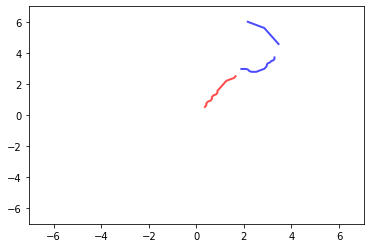

In [31]:
anim_p = animate_trajectory(6000, birds_num=3)
HTML(anim_p.to_html5_video())

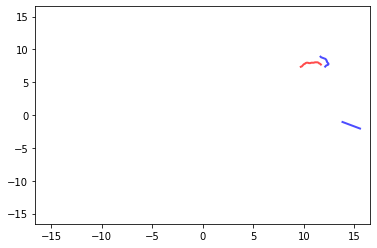

In [33]:
anim_p = animate_trajectory(13000, birds_num=3)
HTML(anim_p.to_html5_video())

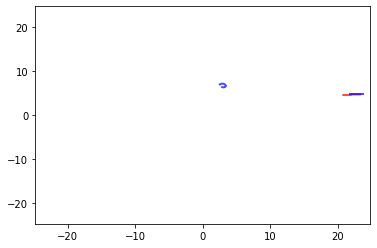

In [34]:
anim_p = animate_trajectory(16000, birds_num=3)
HTML(anim_p.to_html5_video())

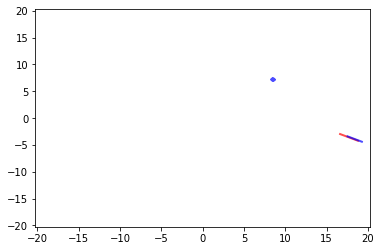

In [36]:
anim_p = animate_trajectory(24000, birds_num=3)
HTML(anim_p.to_html5_video())

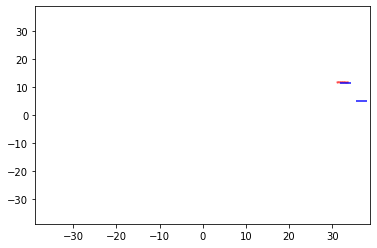

In [37]:
anim_p = animate_trajectory(29000, birds_num=3)
HTML(anim_p.to_html5_video())